## Junliang ZHOU

Student ID: 1300011738

TEL: +86 186-1002-0527

Email: <junliangzhou@pku.edu.cn>

### Updating log 1.3
1. In Problem 2(b): Modified range of slope fittings.

### Updating log 1.2
1. In Problem 2(b): Added fittings to order slope and depth of each simulation.
2. In Problem 2(c) and 2(d): Modified answers related to parameters of simulation results. 

### Updating log 1.1
1. In Problem 3(b) and 3(c): Corrected an error related to the calculation of sample error.

# Topics in Market Microstructure Models - Homework 1 

Assigned: July 12, 2016.
Due: July 19, 2016 by 1pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this Jupyter notebook to Xinquan Chen (cxq_ccer@163.com) and Tai-Ho Wang (tai-ho.wang@baruch.cuny.edu) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

<font color="blue">If you encounter problems with Markdown/LaTeX or Jupyter notebook, please contact your TA Xinquan Chen.


## The Smith Farmer zero-intelligence model

### Download R code

The following code sources *ziSetup.R* which has all the functions required for the problem.

In [2]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/ziSetup.zip", destfile="ziSetup.zip")
unzip(zipfile="ziSetup.zip")

In [6]:
source("ziSetup.R")

### 1. (4 points)

Using the provided functions in *ziSetup.R* (with $\alpha = 1$, $\mu = 10$, $\delta = 1/5$),
initialize the order book and add two orders to the (best) bid side of the book. The resulting
book should have 3 orders at best bid and 1 order at best offer. Plot the resulting book
shape.

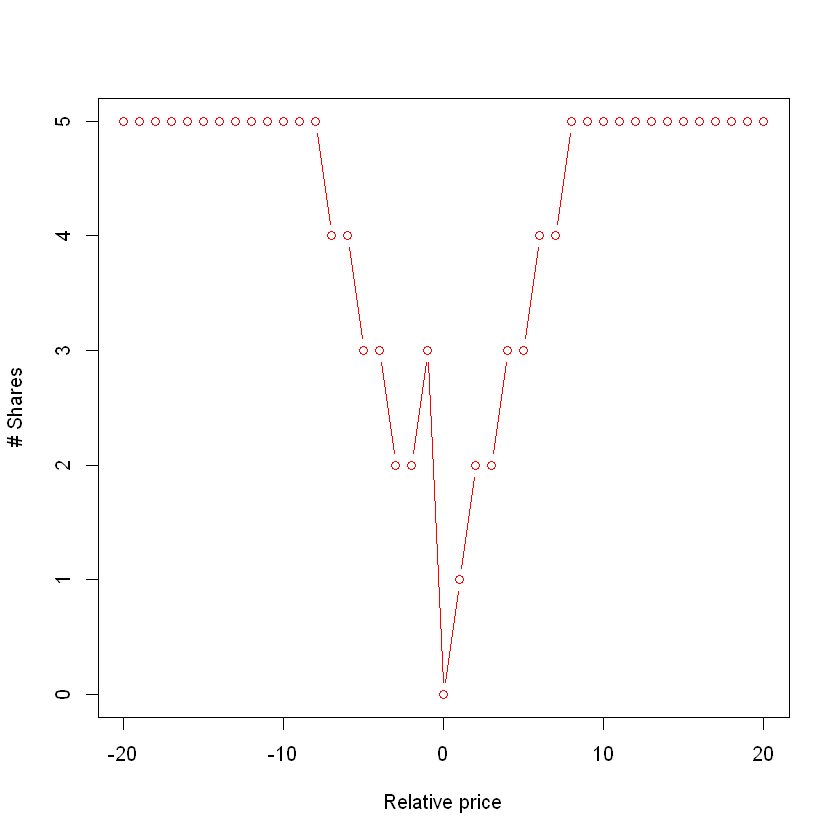

In [12]:
#Mystery tag
logging <- F

#Initialize the order book
alpha <- 1
mu <- 10
delta <- 1/5 
initializeBook5()

#Add two orders to best bid
for(count in 1:2){
  limitBuyOrder(bestBid())
}

#Plot the result
plot(-20:20, bookShape(20), main=NA, xlab="Relative price", ylab="# Shares", col="red", type="b")


### 2. (16 points)

(a) Using the code supplied to generate Figure 2 as a template, simulate 100,000 events, computing the average book shape (in a band $\pm 20$ around the mid price) for the
following sets of parameters:

|$\alpha$|$\mu$|$\delta$|
-----|-----:|-------:|
I| 1 | 10 | $\frac15$
II| 1 | 8 |  $\frac15$
III| 1 |  10 | $\frac16$
IV| 1  | 10 | $\frac18$ 

<font color=blue> Warning: This might take longer than 15 minutes to run!. </font>


(b) Generate a summary plot of the average book shapes for each parameter set (I, II, II, and IV).

(c) Verify that the relationships between the slopes of the order books at-the-money for each parameter set are consistent with the predictions from dimensional analysis.

(d) Verify that the asymptotic book depths are consistent with the predictions from dimensional analysis.

(a), (b)

         Slope    Depth
I   -0.5433792 4.928018
II  -0.5358894 5.048749
III -0.6372678 5.989811
IV  -0.8862045 7.951521


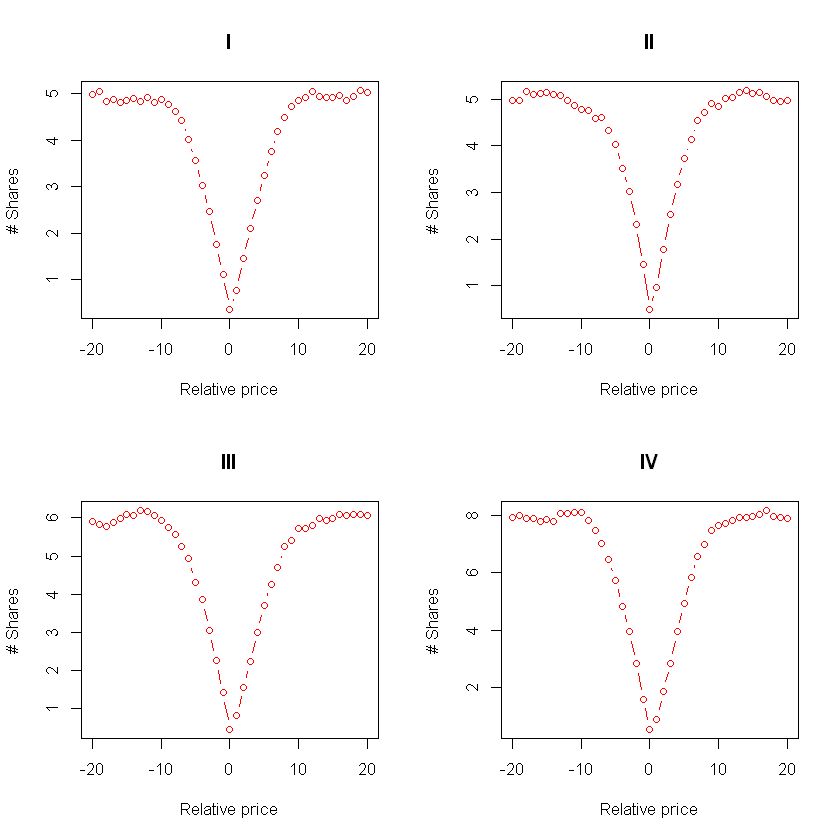

In [10]:
#Function to plot average book shape for given parameters
Figure2 <- function(a, m, d, n){

    #Mystery tag again
    logging <- F

    #Initialize order book
    alpha <<- a
    mu <<- m
    delta <<- d 
    initializeBook5()

    #Burn in for 100 events
    #Don't know what for, so be it.
    for(count in 1:100){
        generateEvent()
    }

    #Set event times
    numEvents <- 100000 

    #Calculate average book shape
    avgBookShape <- bookShape(20) / numEvents
    for(count in 2:numEvents){
        generateEvent()
        avgBookShape <- avgBookShape + bookShape(20) / numEvents
    }
    
    #Fit order slope and depth
    Fitting1 <- lm(avgBookShape[13:21] ~ c(-8:0))
    Fitting2 <- lm(avgBookShape[21:29] ~ c(0:8))
    Slope1 <- summary(Fitting1)$coefficients[2]
    Slope2 <- summary(Fitting2)$coefficients[2]
    Slope <- (Slope1-Slope2) / 2
    Depth <- (mean(avgBookShape[1:10]) + mean(avgBookShape[32:41])) / 2
    Results[n,1] <<- Slope
    Results[n,2] <<- Depth
    
    #Plot the result)
    plot(-20:20, avgBookShape, main=rownames(Results)[n], xlab="Relative price", ylab="# Shares", col="red", type="b")
    
}

#Setup result matrix
Results=matrix(0,4,2)
rownames(Results) <- c("I", "II", "III", "IV")
colnames(Results) <- c("Slope", "Depth")

#Set plots position
par(mfrow=c(2,2))

#Plot results
Figure2(1, 10, 1/5, 1)
Figure2(1, 8, 1/5, 2)
Figure2(1, 10, 1/6, 3)
Figure2(1, 10, 1/8, 4)
print(Results)

(c), (d)

As we know, the slope of the order book has the dimension 
$$
\frac{\alpha^2}{\mu\,\delta}
$$
While the asymptotic book depth has the dimension 
$$
\frac{\alpha}{\delta}
$$
Thus, we can calculate the slope and the depth for each given sets of parameters. The results are shown below.

|    |  Slope  |  Depth  |
|:------:|:-------:|:-------:|
|I|$\frac12$|5|
|II|$\frac58$|5|  
|III|$\frac35$|6|
|IV|$\frac45$|8|

Then, taking a look at those four plots and corresponding parameters drawn above, it can be easily conducted that all of these four plots are consistent with the predictions from dimensional analysis.


### The following code sets up the data required for Problem 3.

In [1]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/ziSimResults.rData_.zip", destfile="ziSimResults.rData.zip")
unzip(zipfile="ziSimResults.rData.zip")
load("ziSimResults.rData")

In [2]:
library(pracma)

### 3. (12 points)

The datafile *ziSimResults.rData* contains a list of bid and ask prices after 100 events resulting from 10,000 simulations of the SFGK model with $\alpha = 1$, $\mu = 10$, and $\delta = 1/5$. The $j$th element of the list has results for an initial book configuration with $q_b = j$ shares on the bid side and $q_a = 1$ share on the ask side.

In [5]:
head(data.frame(ziSimResults))

,bid,ask,bid.1,ask.1,bid.2,ask.2,bid.3,ask.3,bid.4,ask.4,bid.5,ask.5,bid.6,ask.6,bid.7,ask.7,bid.8,ask.8,bid.9,ask.9
1,-1,2,-2,2,-2,4,-1,3,-1,3,-1,2,-1,2,0,3,-1,2,-1,0
2,-1,4,-3,-1,-2,3,1,3,-2,1,-1,0,-1,3,0,4,-1,1,1,2
3,-2,-1,-1,0,-1,0,-1,3,-2,2,-1,2,2,3,-1,1,-1,1,-1,0
4,0,3,-2,3,-2,3,-2,1,0,3,-1,2,-1,1,-1,2,-1,0,-1,3
5,-2,2,0,4,0,3,3,5,-2,2,0,3,-1,2,-1,2,-1,2,1,3
6,-2,0,-4,1,-1,1,-3,2,-1,3,1,3,-1,1,1,2,3,4,2,3


(a) For each size $q_b$ at best bid, compute the mean mid-price after 10,000 events and with error computed as standard deviation of the mean.

(b) Plot mean mid-price vs size at best bid, reproducing Figure 3 of the lecture slides. 
Remember to include error bars!

(c) Repeat part (b) with the order book imbalance $I$ on the x-axis, reproducing Figure 7 in the lecture slides.

(d) If you see an order book with large quantity at the bid and small quantity at the offer, what does it tell you about the future price?

In [3]:
#Extract data
SimResults <- as.matrix(data.frame(ziSimResults))

#Initialize result matrix
Results=matrix(0,2,10)
rownames(Results) <- c("Mean","Std")

#Calculate mean and standard deviation
for (i in 1:10){
    
    #Initialize variables
    BidPrice <- SimResults[,2*i]
    AskPrice <- SimResults[,2*i-1]
    MidPrice <- c(0,10000)
        
    #Calculate
    for (j in 1:10000){
        MidPrice[j] = (BidPrice[j] + AskPrice[j]) / 2
    }
    
    #Transfer results to the result matrix
    Results[1,i] = mean(MidPrice)
    Results[2,i] = sd(MidPrice)/100
}

#Output results
print (Results)

           [,1]      [,2]       [,3]       [,4]       [,5]       [,6]
Mean 0.00590000 0.2155000 0.41350000 0.56635000 0.66850000 0.74110000
Std  0.01537986 0.0143163 0.01310835 0.01229115 0.01123358 0.01038017
           [,7]        [,8]        [,9]       [,10]
Mean 0.80530000 0.809550000 0.838800000 0.834350000
Std  0.01019091 0.009888385 0.009779878 0.009617315


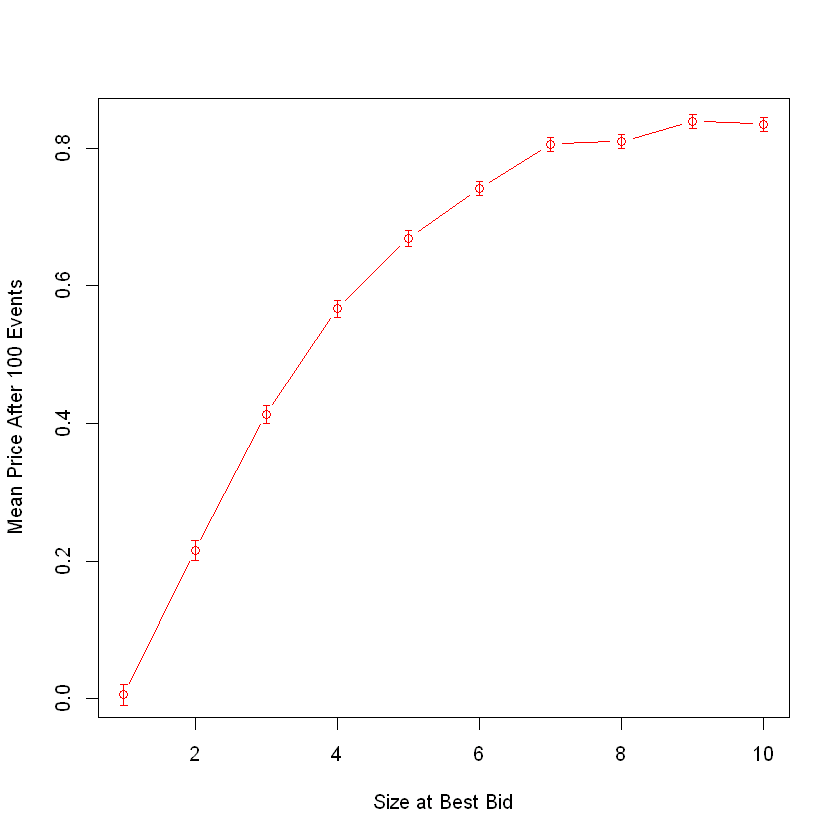

In [4]:
#Plot with error bars
plot(1:10, Results[1,], col = "red", type = "b", xlab = "Size at Best Bid", ylab = "Mean Price After 100 Events")
errorbar(1:10, Results[1,], yerr=Results[2,], add=T, cap=0.015, col="red",lwd=1.5)

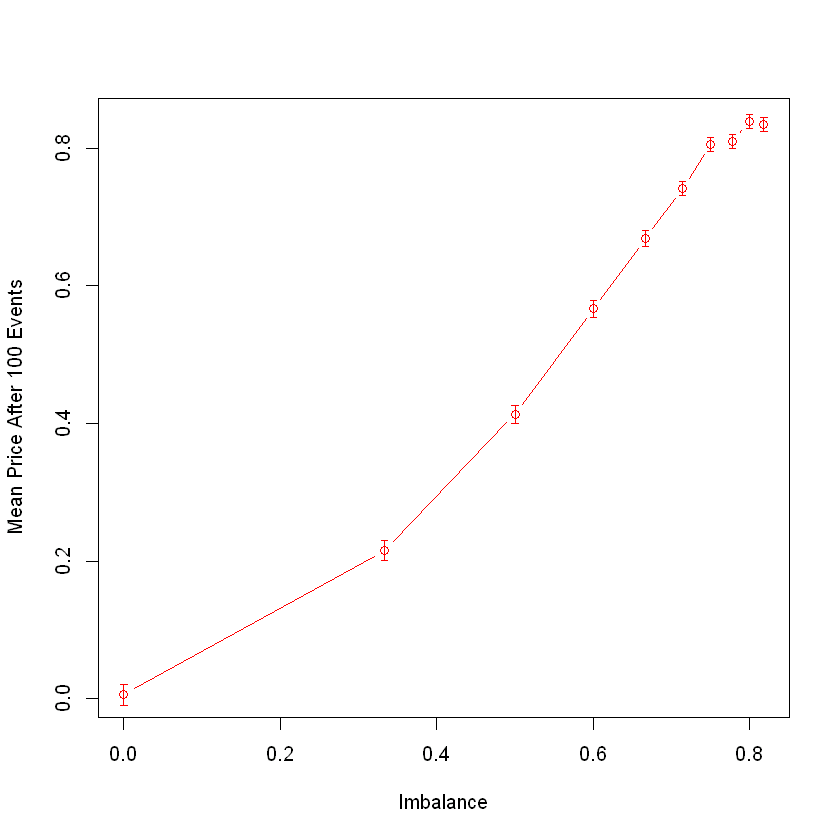

In [7]:
#Plot with error bars
plot(((1:10)-1)/((1:10)+1), Results[1,], col = "red", type = "b", xlab = "Imbalance", ylab = "Mean Price After 100 Events")
errorbar(((1:10)-1)/((1:10)+1), Results[1,], yerr=Results[2,], add=T, cap=0.015, col="red",lwd=1.5)

If an order book has a large quantity at the bid and a small quantity at the offer, the logical presumption should be that the price of the stock will rise up.

## QED